# Introduction and Examples of commonly used Python libraries for Signal Processing and Machine Learning
In this module, we will explore some of the commonly used functions such as:
- Data handling/loading
- Pre-processing
- Visualization/Plotting
- Signal processing 
- Machine learning

An example SSVEP EEG dataset from the following [reference](https://github.com/mnakanishi/12JFPM_SSVEP/tree/master/data) has been used in this notebook to explain some of the functionalities.

# Loading Data
Files can be of the following file formats:
- excel .csv files
- matlab .mat files
- EDF+ format

In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

In [2]:
%%capture
import numpy as np
import scipy.io as sio

from utils import utils as ut

# Loading Matfile

In [3]:
data_path = os.path.abspath('../data/matfile_example')

In [4]:
dataset = sio.loadmat(f'{data_path}/s7.mat')
print('Dataset Contents: \n', dataset.keys())

Dataset Contents: 
 dict_keys(['__header__', '__version__', '__globals__', 'ans', 'train', 'list_sub', 'sub_i', 'eeg'])


In [5]:
print('EEG Data Type is: ', type(dataset['eeg']))
print('EEG Data Shape: ', dataset['eeg'].shape)
print('According to the author, the EEG data is of shape:')
print('(number_of_classes, number_of_channels, total_trial_len, total_number_of_trials)')

EEG Data Type is:  <class 'numpy.ndarray'>
EEG Data Shape:  (12, 8, 1114, 15)
According to the author, the EEG data is of shape:
(number_of_classes, number_of_channels, total_trial_len, total_number_of_trials)


In [6]:
eeg = np.array(dataset['eeg'], dtype='float32')
num_classes = eeg.shape[0]
num_channel = eeg.shape[1]
total_trial_len = eeg.shape[2]
num_trials = eeg.shape[3]
sample_rate = 256

# Text/CSV file example

# Plotting/Visualization - Raw Data

In [7]:
import matplotlib.pyplot as plt

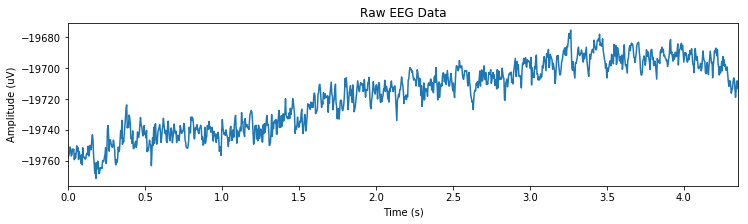

In [8]:
time_axis = np.linspace(0, dataset['eeg'].shape[2], dataset['eeg'].shape[2])/sample_rate

fig, axes = plt.subplots(1, 1, figsize=(12, 3))
axes.plot(time_axis, dataset['eeg'][0, 0, :, 0])
axes.set_ylabel('Amplitude (uV)')
axes.set_xlabel('Time (s)')
axes.set_title('Raw EEG Data')
axes.set_xlim([0, time_axis[-1]])
plt.show()

# Subplots Generation
Let's plot one trial of every channel in the subplots. Note the use of:
1. gridspec_kw: here we specify the vertival and horzontal spacing between the subplots.
2. sharex=True: this shares the xaxis for all the subplots.
3. axes.reshape(-1): provides a list of axes objects for plotting.

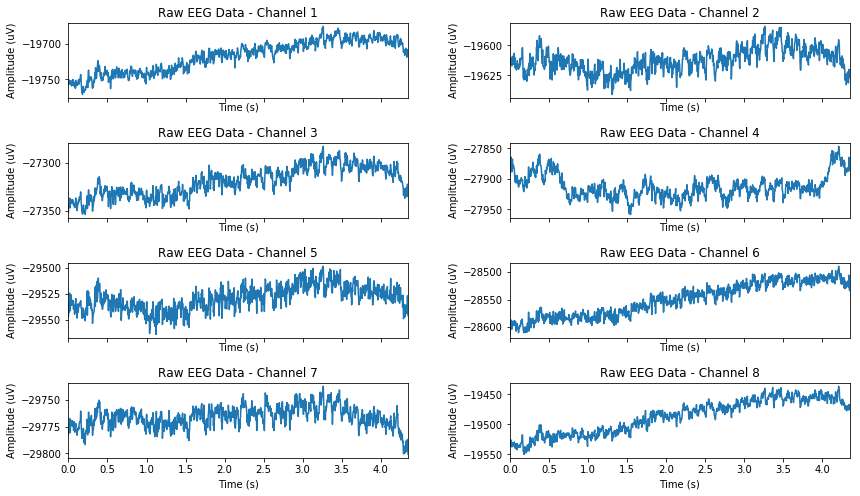

In [9]:
time_axis = np.linspace(0, dataset['eeg'].shape[2], dataset['eeg'].shape[2])/sample_rate

fig, axes = plt.subplots(4, 2, figsize=(14, 8), gridspec_kw=dict(hspace=0.6, wspace=0.3), sharex=True)
axes = axes.reshape(-1)
for chan_idx in np.arange(0, num_channel):
    axes[chan_idx].plot(time_axis, dataset['eeg'][0, chan_idx, :, 0])
    axes[chan_idx].set_ylabel('Amplitude (uV)')
    axes[chan_idx].set_xlabel('Time (s)')
    axes[chan_idx].set_title(f'Raw EEG Data - Channel {chan_idx + 1}')
    axes[chan_idx].set_xlim([0, time_axis[-1]])
plt.show()

# Preprocessing
- Signal filtering
- Signal epoching

## Signal Filtering
Function call: ut.butter_filter(signal_to_filter, 1, 40, sample_rate, 4, btype='bandpass')

In [46]:
signal_to_filter = dataset['eeg'][0, 0, :, 0]
notch_filtered_data = ut.butter_filter(signal_to_filter, 57, 63, sample_rate, 4, btype='bandstop')
filtered_data = ut.butter_filter(signal_to_filter, 1, 40, sample_rate, 4, btype='bandpass')

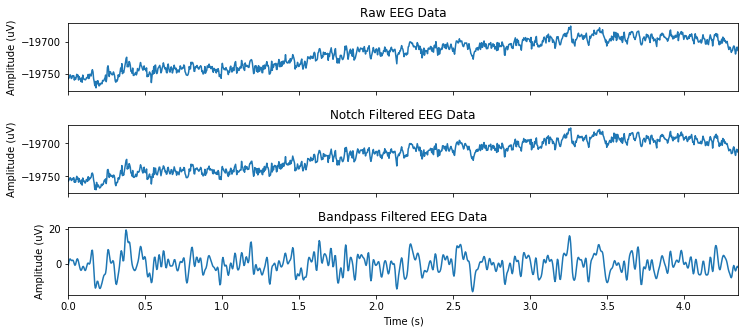

In [52]:
time_axis = np.linspace(0, signal_to_filter.shape[0], signal_to_filter.shape[0])/sample_rate

fig, axes = plt.subplots(3, 1, figsize=(12, 5), gridspec_kw=dict(hspace=0.5), sharex=True)
axes[0].plot(time_axis, signal_to_filter)
axes[1].plot(time_axis, notch_filtered_data)
axes[2].plot(time_axis, filtered_data)

axes[0].set_title('Raw EEG Data')
axes[1].set_title('Notch Filtered EEG Data')
axes[2].set_title('Bandpass Filtered EEG Data')

axes[0].set_ylabel('Amplitude (uV)')
axes[1].set_ylabel('Amplitude (uV)')
axes[2].set_ylabel('Amplitude (uV)')
axes[2].set_xlabel('Time (s)')

axes[0].set_xlim([0, time_axis[-1]])
plt.show()

## Epoching/Segmenting the Filtered Data
segmented_data = ut.buffer(filtered_data, duration, data_overlap)

In [53]:
window_len = 1
shift_len = 1
duration = int(window_len*sample_rate)
data_overlap = (window_len - shift_len)*sample_rate
segmented_data = ut.buffer(filtered_data, duration, data_overlap)
print('Segmented Data Shape: ', segmented_data.shape)

Segmented Data Shape:  (5, 256)


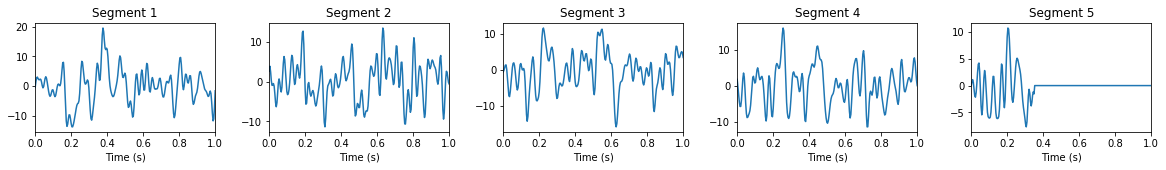

In [54]:
time_axis = np.linspace(0, segmented_data.shape[1], segmented_data.shape[1])/sample_rate

fig, axes = plt.subplots(1, 5, figsize=(20, 2), gridspec_kw=dict(hspace=0.6, wspace=0.3), sharex=True)
axes = axes.reshape(-1)
for segment in np.arange(0, segmented_data.shape[0]):
    axes[segment].plot(time_axis, segmented_data[segment, :])
    axes[segment].set_xlabel('Time (s)')
    axes[segment].set_title(f'Segment {segment + 1}')
    axes[segment].set_xlim([0, time_axis[-1]])
plt.show()

# Signal Processing and Analysis
- Fast fourier transform (FFT)
- Spectrogram
- Power spectral density

# Machine Learning
- Principal Components Analysis (PCA)
- Linear Discriminat Analysis (LDA)
- Support Vector Machine (SVM)
- Distance based classifiers